## Import Necessary Libraries and CIFAR10 Dataset
This code snippet imports necessary libraries for working with CIFAR-10 dataset and support vector machine (SVM) classification. 
The code also loads the CIFAR-10 dataset using TensorFlow's `tf.keras.datasets.cifar10` module.

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import random
import pickle

cifar10 = tf.keras.datasets.cifar10

In [40]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Print the format of each numpy array

In [41]:
print("training images: ", train_images.shape, "\ntraining labels: ",train_labels.shape, "\ntesting data: ", 
      test_images.shape, "\ntesting labels: ", test_labels.shape)

training images:  (50000, 32, 32, 3) 
training labels:  (50000, 1) 
testing data:  (10000, 32, 32, 3) 
testing labels:  (10000, 1)


## Load Additional Car Images

This code loads additional car images found online and appends them to the CIFAR-10 dataset. This is necessary due to the limited number of car images in the CIFAR-10 dataset. By adding more pictures obtained from external sources, we improve the diversity of car images available for training and evaluation purposes.

In [42]:
images = open("../train.pkl", "rb")
car_images = pickle.load(images)
car_labels = np.empty([8144, 1])
for i in range(8144):
    car_labels[i][0] = 1

images.close()

Print the format of each numpy array

In [43]:
print("car data: ", car_images.shape, "\ncar labels: ",car_labels.shape)

car data:  (8144, 32, 32, 3) 
car labels:  (8144, 1)


Concatenate the CIFAR10 Training Images and Car Data

In [44]:
train_images = np.concatenate((train_images, car_images))
train_labels = np.concatenate((train_labels, car_labels))

Print out the format of each numpy array to confirm increase in data after concatenation

In [45]:
print("training data: ", train_images.shape, "\ntraining labels", train_labels.shape)

training data:  (58144, 32, 32, 3) 
training labels (58144, 1)


In [46]:
# Define class names for labels
'''
The class names are defined as 'NOT vehicle' and 'vehicle' 
to represent the two labels in the dataset.
'''

class_names = ['NOT vehicle', 'vehicle']

# Reduce the dataset to only have 2 labels
'''
This loop iterates over the training and testing labels, 
changing labels that are not 1 (automobile) or 9 (truck) to 0 and retaining 
labels 1 (automobile) and 9 (truck) as 1 (car). This effectively reduces the dataset 
to only contain two labels, greatly simplifying the problem 
and potentially improving model accuracy.
'''

for i in range(50000):
    if train_labels[i][0] not in {1, 9}:
        train_labels[i][0] = 0
    else:
        train_labels[i][0] = 1
        
for i in range(10000):
    if test_labels[i][0] not in {1, 9}:
        test_labels[i][0] = 0
    else:
        test_labels[i][0] = 1


Plot random images from the training data

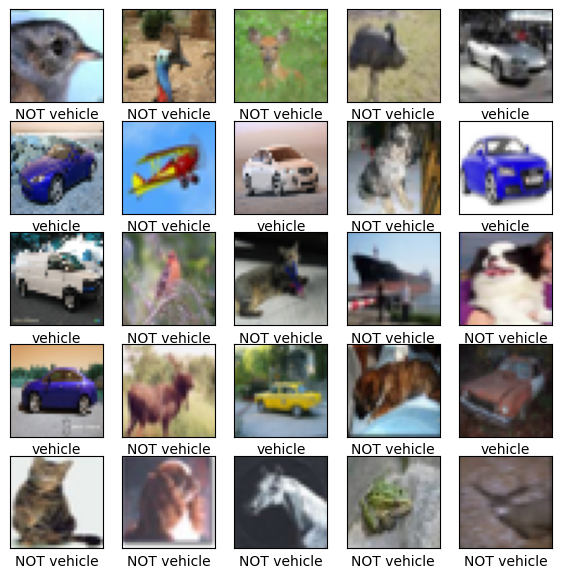

In [47]:
plt.figure(figsize=(7,7))
for i in range(25):
    random_image = random.randint(1,58144)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_image])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[int(train_labels[random_image][0])])
plt.show()

## Preprocessing

In [48]:
# Normalize pixel values
'''
This step normalizes the pixel values of the images by dividing 
them by 255.0, which scales the pixel values to the range [0, 1].
'''

train_images, test_images = train_images / 255.0, test_images / 255.0

# Preprocessing: Flatten the images
'''
The images are flattened to convert them into a 1D array, 
which is required for input into machine learning models.
'''

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Flatten the labels
'''
The labels are flattened to ensure they are compatible with 
the flattened images and can be used for training the model.
'''

train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Create a subset for development to avoid long training time
'''
A subset of the training data is created to expedite development 
and testing of the model, reducing the number of samples to a 
manageable size. The subset size is defined as 'subset_size'.
'''

subset_size = 5000

# Randomly select indices for the subset
'''
Random indices are selected from a range within the training dataset 
to create the subset. These indices are used to extract a subset 
of images and labels for training and evaluation.
'''

subset_indices = np.random.choice(np.arange(46500, 52500), subset_size, replace=False)

# Create the subset
'''
The subset of training images and labels is created using the randomly 
selected indices, enabling faster training and evaluation of the model.
'''

sub_train_images = train_images[subset_indices]
sub_train_labels = train_labels[subset_indices]


## Declare & fit the model
After testing different kernels through GridSearchCV, it has been determined that `poly` is the best model to be used for this project

In [49]:
Pol_Model = SVC(probability=False, kernel = 'poly', C = 0.1)

In [50]:
Pol_Model.fit(sub_train_images, sub_train_labels)

SVC(C=0.1, kernel='poly')

## Predict on test data

In [51]:
# Predict the labels for test set
pred_label = Pol_Model.predict(test_images)

# Evaluate the model
accuracy = accuracy_score(test_labels, pred_label)
#report = classification_report(test_labels, pred_label)

print("Accuracy:", accuracy)
#print("Classification Report:")
#print(report)

Accuracy: 0.8252


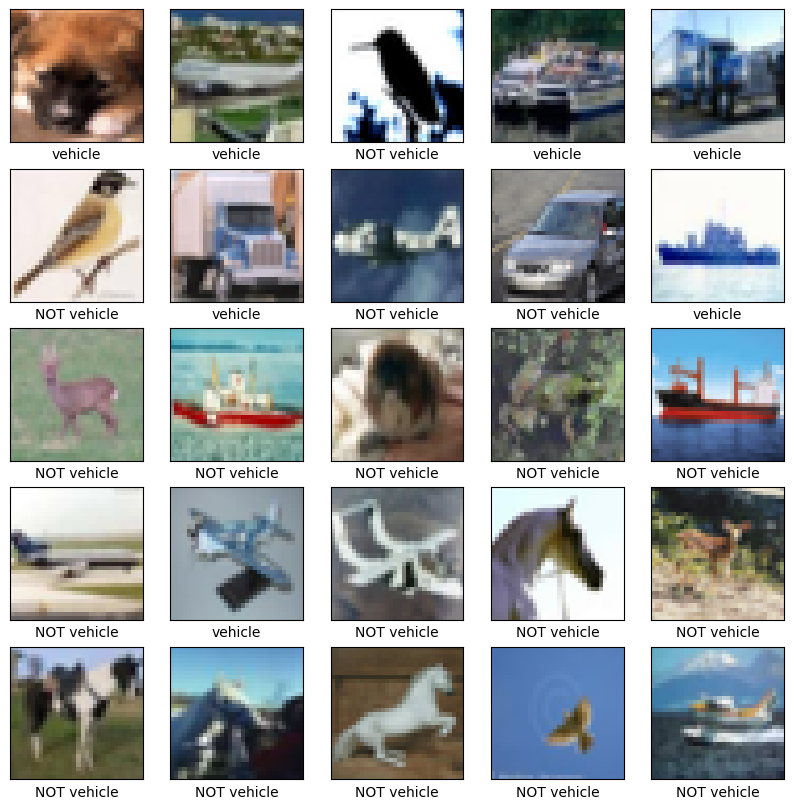

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    random_image = random.randint(1,10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_image].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[int(pred_label[random_image])])  # Use predicted labels
plt.show()


## Predict on custom images

In [53]:
images = open("../output.pkl", "rb")

dev_images = pickle.load(images)

images.close()

# Normalize pixel values
dev_images = dev_images / 255.0

# Preprocessing: Flatten the images
dev_images = dev_images.reshape(dev_images.shape[0], -1)

In [54]:
dev_pred_label = Pol_Model.predict(dev_images)

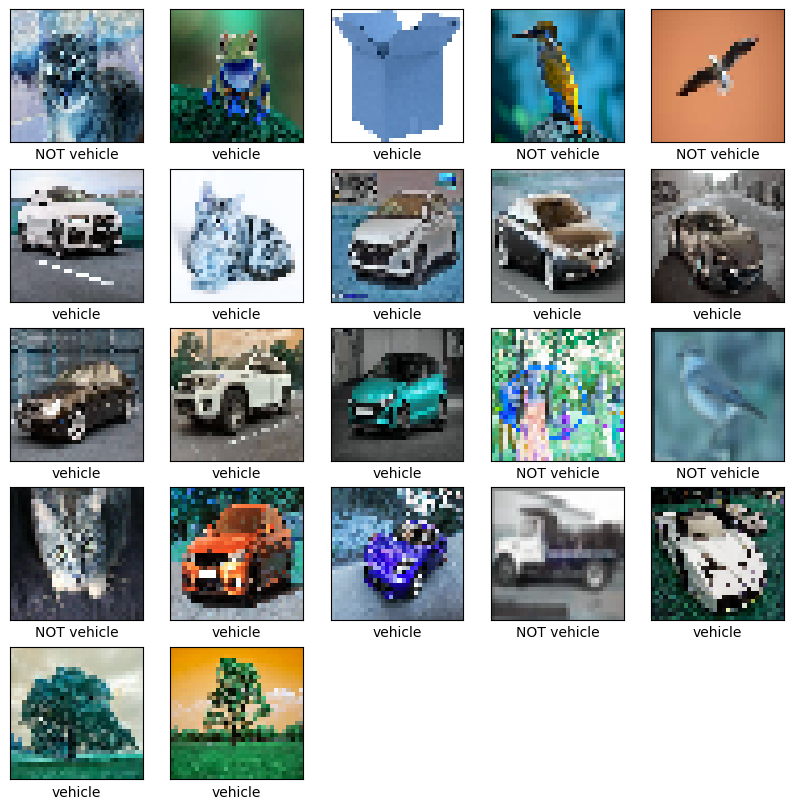

In [55]:
plt.figure(figsize=(10,10))
for i in range(22):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dev_images[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[int(dev_pred_label[i])])  # Use predicted labels
plt.show()
